In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [85]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [89]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(0, inplace= True)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


<ipython-input-90-381c2fed095f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Churn'], palette='coolwarm')


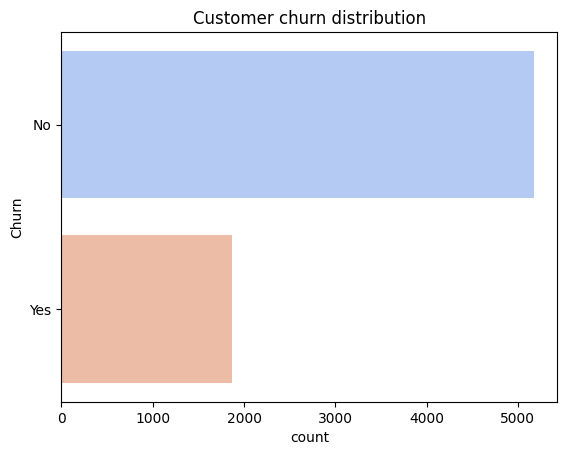

In [90]:
print(df['Churn'].value_counts(normalize=True)*100)
sns.countplot(df['Churn'], palette='coolwarm')
plt.title('Customer churn distribution')
plt.show()

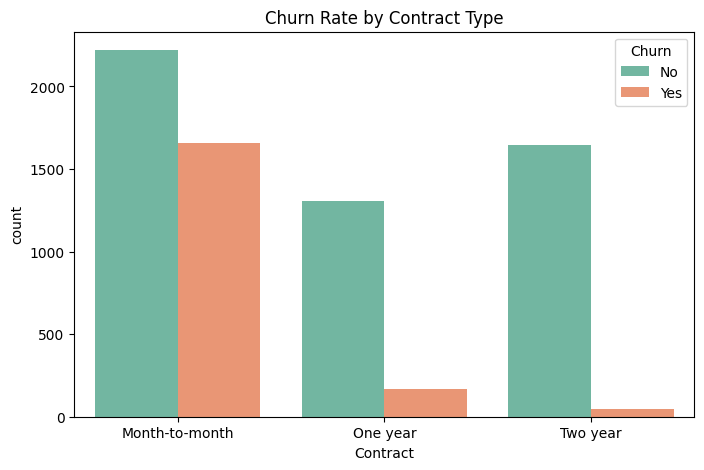

In [91]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn Rate by Contract Type")
plt.show()

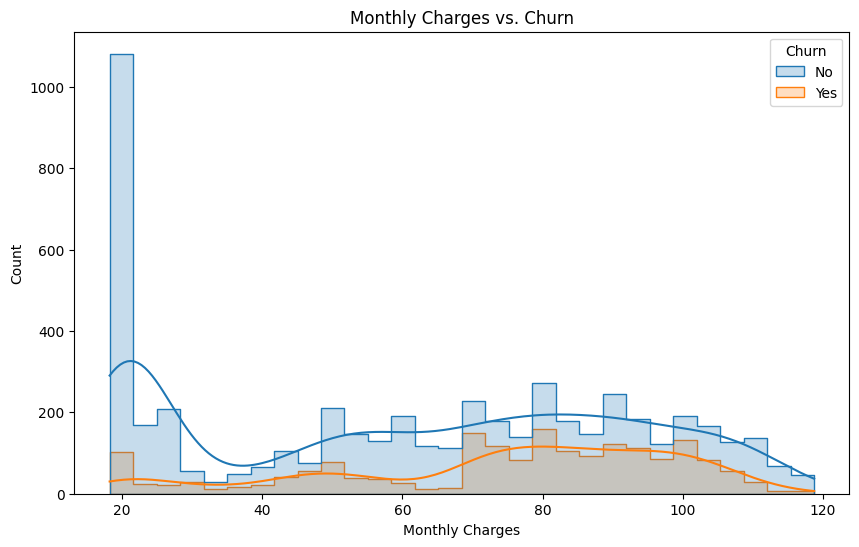

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn',kde=True,bins=30, element='step')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

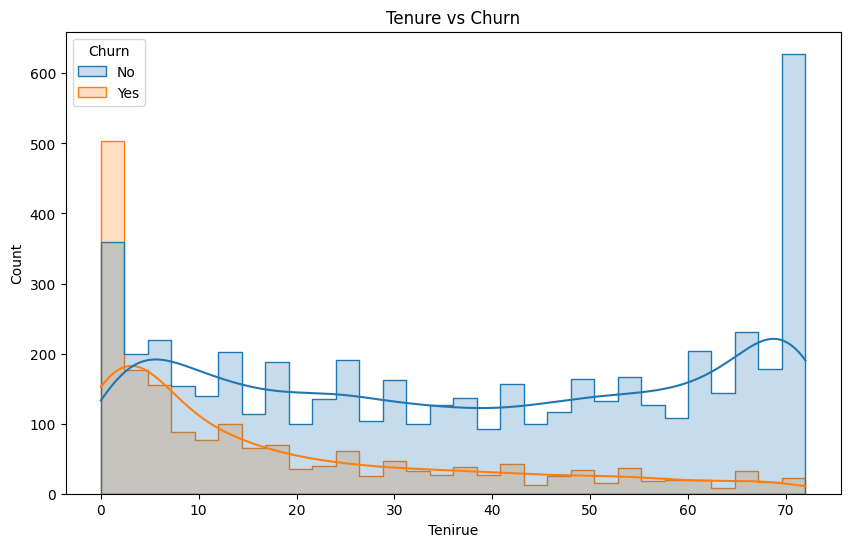

In [93]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure',hue='Churn',kde= True,bins=30,element="step")
plt.title('Tenure vs Churn')
plt.xlabel('Tenirue')
plt.ylabel('Count')
plt.show()

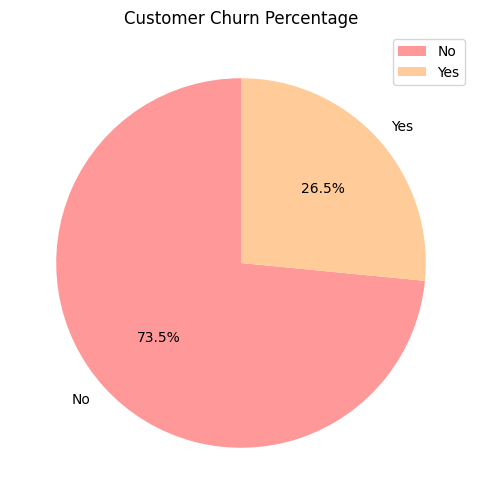

In [94]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(churn_counts,labels=churn_counts.index,autopct='%1.1f%%',startangle=90,colors=['#ff9999','#ffcc99'])
plt.legend()
plt.title('Customer Churn Percentage')
plt.show()

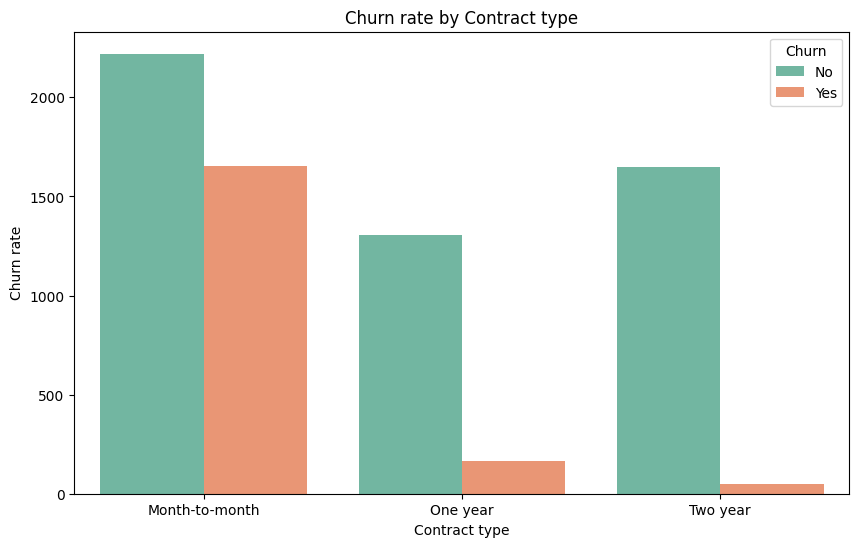

In [95]:
plt.figure(figsize=(10,6))

sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title('Churn rate by Contract type')
plt.xlabel('Contract type')
plt.ylabel('Churn rate')
plt.show()

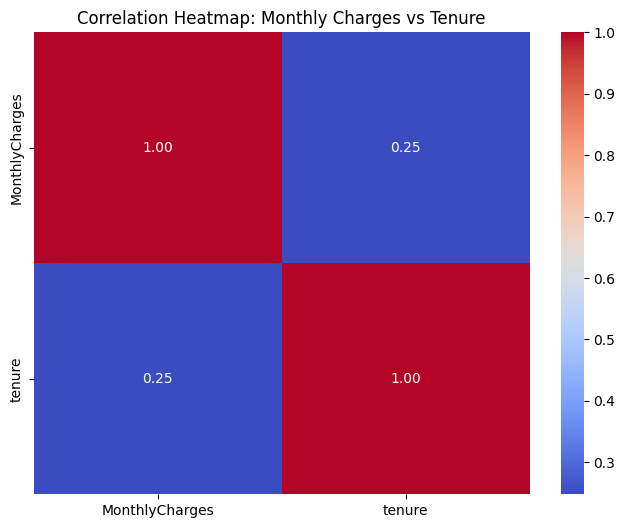

In [96]:
correlation_data = df[["MonthlyCharges",'tenure']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap: Monthly Charges vs Tenure')
plt.show()

Data Preprocessing for Machine